In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
%matplotlib inline

### Load data (pre-processed in clean.ipynb) and define useful constants

In [18]:
# load data
# res = pd.read_csv("results/results_cleaned.csv")
res = pd.read_csv("results/results_cleaned_no_outliers.csv")

# required fields
ids = ['timestamp','postId','workerId','mode']

# interactions
inter = ['timestamp','postId','workerId','mode','interaction','UrlChanges', 'highUrlChanges', 
       'lowUrlChanges', 'medUrlChanges', 'model', 'pop_time']

modes = ["List", "Category", "Pairwise"]

In [19]:
# compute bootstrapped confidence interval
def bootstrap_mean(data, n_bootstraps):
    bootstraps = []
    for i in range(n_bootstraps):
        # Sample with replacement from data
        bootstraps.append(resample(data).mean())
    return pd.Series(bootstraps)

In [20]:
inter_l = ['timestamp','workerId','mode','interaction','UrlChanges'] 
inter_c = ['timestamp','workerId','mode','interaction','highUrlChanges', 'lowUrlChanges', 'medUrlChanges']
inter_p = ['timestamp','workerId','mode','interaction','highUrlChanges', 'lowUrlChanges']

ints = {}
ints['l'] = res[inter_l][res['mode']=='List'].drop_duplicates(subset=['workerId','interaction','UrlChanges'])
ints['c'] = res[inter_c][res['mode']=='Category'].drop_duplicates(subset=['workerId','interaction','highUrlChanges', 
                                                                'lowUrlChanges', 'medUrlChanges'])
ints['p'] = res[inter_p][res['mode']=='Pairwise'].drop_duplicates(subset=['workerId','interaction','highUrlChanges', 
                                                                'lowUrlChanges'])

adds={}
removes={}
ranks = {}
for i in ints:
    ints[i] = ints[i].groupby(['workerId']).apply(pd.DataFrame.sort_values, 'timestamp')
    ints[i] = ints[i].reset_index(drop=True)
    ints[i].dropna(subset =['interaction'])
    
adds = {}
adds['List'] = ints['l'][ints['l']['interaction'] == 'ADD'].groupby('workerId').count()['interaction']
adds['Category'] = ints['c'][ints['c']['interaction'].isin(['LOW ADD', 'HIGH ADD', 'MED ADD'])].groupby('workerId').count()['interaction']
adds['Pairwise'] = ints['p'][ints['p']['interaction'].isin(['LEFT ADD', 'RIGHT ADD'])].groupby('workerId').count()['interaction']

removes = {}
removes['List'] = ints['l'][ints['l']['interaction'] == 'REMOVE'].groupby('workerId').count()['interaction']
removes['Category'] = ints['c'][ints['c']['interaction'].isin(['LOW REMOVE', 'HIGH REMOVE', 'MED REMOVE'])].groupby('workerId').count()['interaction']
removes['Pairwise'] = ints['p'][ints['p']['interaction'].isin(['LEFT REMOVE', 'RIGHT REMOVE'])].groupby('workerId').count()['interaction']

In [21]:
adds={}
removes={}
ranks = {}
for i in ints:
    ints[i] = ints[i].groupby(['workerId']).apply(pd.DataFrame.sort_values, 'timestamp')
    ints[i] = ints[i].reset_index(drop=True)
    ints[i].dropna(subset =['interaction'])

In [22]:
adds = {}
adds['List'] = ints['l'][ints['l']['interaction'] == 'ADD'].groupby('workerId').count()['interaction']
adds['Category'] = ints['c'][ints['c']['interaction'].isin(['LOW ADD', 'HIGH ADD', 'MED ADD'])].groupby('workerId').count()['interaction']
adds['Pairwise'] = ints['p'][ints['p']['interaction'].isin(['LEFT ADD', 'RIGHT ADD'])].groupby('workerId').count()['interaction']

removes = {}
removes['List'] = ints['l'][ints['l']['interaction'] == 'REMOVE'].groupby('workerId').count()['interaction']
removes['Category'] = ints['c'][ints['c']['interaction'].isin(['LOW REMOVE', 'HIGH REMOVE', 'MED REMOVE'])].groupby('workerId').count()['interaction']
removes['Pairwise'] = ints['p'][ints['p']['interaction'].isin(['LEFT REMOVE', 'RIGHT REMOVE'])].groupby('workerId').count()['interaction']

In [23]:
adds['Category']

workerId
A11BSFO4LMHPXQ     12
A126IMAJ4EEE7      26
A15SUPIZ05ZFCD     41
A17V85U8PXS4LJ     56
A196XR61DIW5GU     12
A1FLEFIVFT809G     85
A1HG89IPHXW7LO      4
A1JGA15NKUP0BB      3
A1KM8AW99FFRFZ      9
A1N1EF0MIRSEZZ     71
A1NBX7UHTU5CKG     48
A1PF01FF85HUY4     16
A1PTX4IB9R34LI      3
A1TARNH07A75CG     22
A1TYP11M6YZUK8    254
A1XZ9MUNKFZIJG    132
A1Z3NTRGIUZ240      4
A28T38MOUG43YD     12
A2BADLL5Q78E7D    231
A2BF3A9KYSEFPO     53
A2CIFCKECOSW0S    313
A2HX72NU82J6NZ      9
A2NGMLBFZ3YQP5     38
A2OFWFHVQOBY56     10
A2T5UVJCDX3C5      10
A2W6XZ8D8VYZCO     33
A3696JXTRKL2FI     12
A39K5MR4MCSC56    325
A3DLPY6ABKCXSI     15
A3J5KTBHZI60H     233
A3JAOT764X4HYB     14
A3ROADR7T6811      26
A3TOHZTNKOTFQL     13
A3TUCOUVSP9ZGY      6
A3TUJHF9LW3M8N     12
A5BMKZRGHNSRT     354
AFXNF8FWT090W       9
ANPTDUX6LOGYY     249
Name: interaction, dtype: int64

In [24]:
removes['Category']

workerId
A11BSFO4LMHPXQ     1
A126IMAJ4EEE7      9
A15SUPIZ05ZFCD     6
A17V85U8PXS4LJ     8
A196XR61DIW5GU     3
A1FLEFIVFT809G     8
A1HG89IPHXW7LO     1
A1KM8AW99FFRFZ     4
A1N1EF0MIRSEZZ    11
A1NBX7UHTU5CKG     5
A1PF01FF85HUY4     3
A1TARNH07A75CG     5
A1TYP11M6YZUK8    29
A1XZ9MUNKFZIJG    16
A1Z3NTRGIUZ240     1
A28T38MOUG43YD     2
A2BADLL5Q78E7D     1
A2BF3A9KYSEFPO    16
A2CIFCKECOSW0S    79
A2HX72NU82J6NZ     1
A2NGMLBFZ3YQP5     2
A2OFWFHVQOBY56     3
A2T5UVJCDX3C5      2
A2W6XZ8D8VYZCO     6
A3696JXTRKL2FI     2
A39K5MR4MCSC56    90
A3DLPY6ABKCXSI     1
A3J5KTBHZI60H      3
A3ROADR7T6811      6
A3TOHZTNKOTFQL     4
A3TUCOUVSP9ZGY     1
A3TUJHF9LW3M8N     3
A5BMKZRGHNSRT     84
AFXNF8FWT090W      5
ANPTDUX6LOGYY     31
Name: interaction, dtype: int64

In [25]:
adds['List']

workerId
A13HZKB2NGZP6B      5
A14WLAP6TCEKO0      8
A16YCBEW9H2GVQ     14
A1BXFL13FNC4JZ     11
A1CY7IOJ9YH136     11
A1DQAWWURWP4FZ      2
A1DS5O8MSI3ZH0      7
A1F1BIPJR11LSR     12
A1IJ86B8ZRKXBI      2
A1KEAHVVML6319     14
A1KNQOTRLV1DLV     28
A1L82EA5PNL5RO    243
A1XATJA7ENOGWB     13
A1ZKNQJO513B3W     11
A206HSNUW6LHQK     38
A20J7F7PKEZZV2      7
A20Z5O57UDPFLX      7
A23CR631VMJ5DI      3
A25FLQSIB09JW2     51
A2C84POENS2UNY      8
A2E5PZUD6W4OA1     10
A2FUPODRRCESB      13
A2G4G3QXFP4WSZ      5
A2JLTIRIJ1V8UP     11
A2M6TJIR21BN2W     11
A2NX3S99EUKJFF      5
A2T11H7YI7QPGD      5
A2ZV96GRXVSXK4      6
A31GBEJ7KZKFSK      7
A39Q4SNT7SRK94     13
A3E52NQFBDRD87     15
A3L8LSM7V7KX3T     14
A3LC6M2EMDBBXP      5
A3RBA581BHJDR8    127
A3VDV5S42JSDCP     15
A3VENK02U0X16N     15
A9ZCY6FLUCIU1      10
ACON9O9NMFOHE      11
AEN7H01OU26XL      11
AGC3T6724JUAF      12
AKNYT1NTK2UFK      13
AM8OWAW9TUVLN       6
ATOV0H5KQHI29      13
AUCHGHY1IKZZK       8
AV7UX8QQXABSK       8
A

In [26]:
adds['Pairwise']

workerId
A16SAB417Y96G4     2
A19DZAFFZEU6GN    16
A1GKD3NG1NNHRP    17
A271V19C06841K     6
A2ATUQ491PEC7L     4
A2C7TMRC2QHTIW     9
A2CISHIOILFDHN    29
A2M5VW97GIYLHB    31
A3EG4C9T4F5DUR    26
A3H3NJ23IM4XUZ     2
A3TCVXCMU6MTPB    20
AM2KK02JXXW48     12
AO33H4GL9KZX9     15
ARIMQAMYUB6TH     17
AUFEIF3EGRO2C      8
Name: interaction, dtype: int64

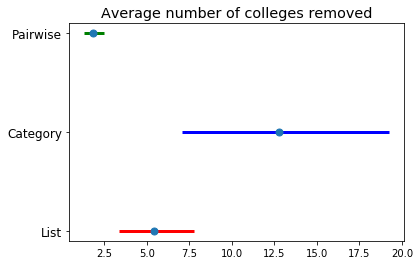

In [27]:
boot = pd.DataFrame()
for m in modes:
    boot[m] = bootstrap_mean(removes[m], 1000)
    
mean = boot.mean()
err = []
err.append((boot.apply(lambda x : np.percentile(x, (5))) - mean).abs())
err.append(boot.apply(lambda x : np.percentile(x, (95))) - mean)
plt.errorbar(mean, [0,1,2], xerr=err, fmt='o-',linestyle='none', ecolor=['red','blue','green'], elinewidth=3, markersize=7 )
plt.yticks([0,1,2], mean.index, size='large')
plt.title('Average number of colleges removed', size='x-large')
# plt.show()
plt.savefig('results/remove.png', bbox_inches='tight')

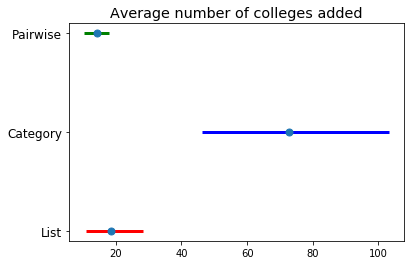

In [29]:
# use percentiles

boot = pd.DataFrame()
for m in modes:
    boot[m] = bootstrap_mean(adds[m], 1000)
mean = boot.mean()
err = []
err.append((boot.apply(lambda x : np.percentile(x, (5))) - mean).abs())
err.append(boot.apply(lambda x : np.percentile(x, (95))) - mean)
plt.errorbar(mean, [0,1,2], xerr=err, fmt='o-',linestyle='none', ecolor=['red','blue','green'], elinewidth=3, markersize=7 )
plt.yticks([0,1,2], mean.index, size='large')
plt.title('Average number of colleges added', size='x-large')
# plt.show()
plt.savefig('results/add.png', bbox_inches='tight')

In [30]:
# count number of time switching between build and explore
res['interaction'].unique()

array(['QUESTION', 'HIGH ADD', 'LOW ADD', 'ADD', nan, 'SUBMIT SUCCESFUL',
       'MED ADD', 'MED REMOVE', 'RANK', 'LOW REMOVE', 'PREVIOUS',
       'RIGHT ADD', 'RIGHT REMOVE', 'FINISH TEST', 'LEFT ADD',
       'HIGH REMOVE', 'NEW PAIR', 'SHUFFLE', 'REMOVE', 'SUBMIT FAIL',
       'SORT', 'FINISH', 'LEFT REMOVE'], dtype=object)

In [31]:
df =res.drop_duplicates(subset=['workerId'])
counts = df[['workerId', 'mode']].groupby(['mode']).count()
counts

,workerId
mode,
Category,39
List,49
Pairwise,15


In [18]:
counts['workerId']['List']

15

In [19]:
for m in modes:
    df = res[res['mode'] == m]
    c = df[df['interaction']=='PREVIOUS'][['workerId','interaction']].groupby('workerId').count()
    # get total number 
    num = c.shape[0]
    # adjust average to include those who don't ever iterate
    print(m)
    print(c.mean() / (counts['workerId']['List'] - num))

List
interaction    0.203704
dtype: float64
Category
interaction    0.076923
dtype: float64
Pairwise
interaction    0.277778
dtype: float64
